# [ 6ÎÖÑ Ï†ÑÍ≥ºÏùò Îπµ ÎπÑÍµê ]

## 1. Ïñ∏Í∏â ÎπµÏßëÏàúÏúÑ
#### - 'ÎπµÏßëÏù¥Î¶Ñ' Ïó¥, Îã®Ïàú ÎπàÎèÑÎ°ú ÎÇòÏó¥
#### - Ïú†ÏùòÌïú Î≥ÄÌôîÍ∞Ä ÏûàÎäîÏßÄ? 
+ 2020 ÏÑúÏö∏ ÎπµÏßë ÏàúÏúÑ
+ 2020 ÏßÄÏó≠Î≥Ñ ÎπµÏßë ÏàúÏúÑ
+ 2019.08 ~ 2020.07 vs 2013.08 ~ 2014.07

---------

## 2. ÎÇ¥Ïö©Ïóê Ïñ∏Í∏âÎêú Îã®Ïñ¥Ïóê Î≥ÄÌôîÍ∞Ä ÏûàÏùÑÍπå?
#### - 'ÎÇ¥Ïö©' Ïó¥, Ï†ÑÏ≤òÎ¶¨ ÌïÑÏöî - Îπµ Ïö©Ïñ¥ + Îç∞Ïù¥ÌÑ∞ Î≥¥Í≥† ÏßÅÏ†ëÏ∂îÍ∞ÄÌïòÍ∏∞?
#### - Ïú†ÏùòÌïú Î≥ÄÌôîÍ∞Ä ÏûàÎäîÏßÄ?
+ 2020 ÎÇ¥Ïö©Ïùò Îã®Ïñ¥ ÏàúÏúÑ vs 2014 ÎÇ¥Ïö©Ïùò Îã®Ïñ¥ ÏàúÏúÑ
+ ÏàúÏúÑ ÏãúÍ∞ÅÌôî

---------

## 3. Ïó∞Í¥ÄÏñ¥ Î∂ÑÏÑù
#### - 'ÎÇ¥Ïö©' Îç∞Ïù¥ÌÑ∞ ÌÜ†ÎåÄÎ°ú Í∞ôÏùÄ Î¨∏Ïû•Ïóê Ïñ∏Í∏âÎêú Îã®Ïñ¥.
#### - Í∞ôÏùÄ Í∏Ä ÏïàÏóê Ïñ∏Í∏âÎêú Îã®Ïñ¥ÎèÑ Ï≤òÎ¶¨Ìï† Ïàò ÏûàÏùÑÍπå?
+ 2020 + 2014 Ìï©Ï≥êÏÑú Ïó∞Í¥ÄÏñ¥ Î∂ÑÏÑù 
+ ÏãúÍ∞ÅÌôî

In [1]:
# ÌÅ¨Î°§ÎßÅ ÏúÑÌïú Ìå®ÌÇ§ÏßÄ
#from selenium import webdriver
#from bs4 import BeautifulSoup
import pandas as pd
import time
import re
import csv

# Î™ÖÏÇ¨ Ï∂îÏ∂úÌïòÍ∏∞ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ konlpy ÏÑ§Ïπò
# Ï∂îÏ∂ú Î™ÖÏÇ¨ countÎ•º ÏúÑÌïú collection
from konlpy.tag import Okt
from collections import Counter

# Ïó∞Í¥ÄÏñ¥ Î∂ÑÏÑù Ìå®ÌÇ§ÏßÄ Î°úÎî©ÌïòÍ∏∞
import numpy as np
import glob
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from gensim.models.word2vec import Word2Vec

# ÎÑ§Ìä∏ÏõåÌÅ¨ Î∂ÑÏÑù
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import operator

# ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import font_manager
#import pytagcloud  # error : No module named 'pygame', ÌïòÏßÄÎßå ÌïòÍ≥† Ïã∂ÏùÄÍ≤ÉÏùÄ ÎèºÏÑú Í∑∏ÎÉ• ÎëêÏóàÎã§.
from matplotlib.pyplot import figure

In [138]:
! pip3 install git+https://github.com/python-visualization/branca.git@master

  Cloning https://github.com/python-visualization/branca.git (to revision master) to /private/var/folders/0f/3kvptjj52h51rwnrbz5lvf6h0000gn/T/pip-req-build-1wk54_ux
Using legacy 'setup.py install' for branca, since package 'wheel' is not installed.
  Attempting uninstall: branca
    Found existing installation: branca 0.4.1
    Uninstalling branca-0.4.1:
      Successfully uninstalled branca-0.4.1
    Running setup.py install for branca ... done


# 1. Ïñ∏Í∏â ÎπµÏßë ÏàúÏúÑ

## 1) 2014 vs 2020 Ï†ÑÍµ≠ Î≤†Ïù¥Ïª§Î¶¨ ÏàúÏúÑ 

In [2]:
# ÏãúÍ∞ÅÌôî ÏúÑÌïú Ìï®Ïàò 
def showGraph(wordInfo):
    
    font_location = "/Library/Fonts/Arial Unicode.ttf"
    font_name = font_manager.FontProperties(fname=font_location).get_name()
    matplotlib.rc('font', family=font_name)

    plt.xlabel('Ï£ºÏöî Îã®Ïñ¥')
    plt.ylabel('ÎπàÎèÑÏàò')
    plt.grid(True)
    
    Sorted_Dict_Values = sorted(wordInfo.values(), reverse=True)
    Sorted_Dict_Keys = sorted(wordInfo, key=wordInfo.get, reverse=True)

    plt.bar(range(len(wordInfo)), Sorted_Dict_Values, align='center')
    plt.xticks(range(len(wordInfo)), list(Sorted_Dict_Keys), rotation='70')

    plt.show()

#[CODE 2]
def saveWordCloud(wordInfo, filename):
    
    taglist = pytagcloud.make_tags(dict(wordInfo).items(), maxsize=80)
    pytagcloud.create_tag_image(taglist, filename, size=(640, 480), fontname='korean', rectangular=False)
    webbrowser.open(filename)   
    

In [23]:
def countGraph(df, num):
    # dfÏóêÏÑú ÎπµÏßëÏù¥Î¶Ñ Ïª¨Îüº ÏÑ†ÌÉù 
    df = df['ÎπµÏßëÏù¥Î¶Ñ'].tolist()
    df = [x for x in df if str(x) != 'nan']
    df = [x for x in df if str(x) != '[]']
    df = [x for x in df if str(x) != 'ÏÑ±Ïã¨Îãπ']
    df = [x for x in df if str(x) != 'ÏïÑÎπ†ÏùòÍøà']
    df = [x for x in df if str(x) != 'ÎπµÏßë']
    df = [x for x in df if str(x) != 'ÏïàÏä§Î≤†Ïù¥Ïª§Î¶¨']
    df = [x for x in df if str(x) != 'ÌíçÎÖÑÏ†úÍ≥º']
    df = [x for x in df if str(x) != 'ÏãúÏò§ÏΩîÎÇò']
    df = [x for x in df if str(x) != 'ÏòµÏä§']
    df = [x for x in df if str(x) != 'Ïù¥ÏÑ±Îãπ']
    df = [x for x in df if str(x) != 'Î•¥Î∞∞']
    df = [x for x in df if str(x) != 'ÎßàÏπ¥Î°±']

    bk_list = []
    for i in range(0, len(df)):
            bk_list.append(df[i].split())

    # Î™ÖÏÇ¨ÎπàÎèÑ Ïπ¥Ïö¥Ìä∏
    count = Counter(df)

    # ÏãúÍ∞ÅÌôî
    wordInfo = dict()
    for tags, counts in count.most_common(num):
        if (len(str(tags)) > 1):
            wordInfo[tags] = counts
            print ("%s : %d" % (tags, counts))

    showGraph(wordInfo)

## 2) 2014 vs 2020 ÏÑúÏö∏Î≤†Ïù¥Ïª§Î¶¨ ÏàúÏúÑ

ÎîîÏñ¥Î∏åÎ†àÎìú : 62
ÏüùÎ∏îÎûëÏ†úÎ¶¨ : 60
Ïö∞Ïä§Î∏îÎûë : 57
Î∏åÎ†àÎìú : 56
ÎπµÎÇòÎ¨¥ : 54
Ìå•Í≥†Îãπ : 54
ÌîÑÎûëÏÑ∏Ï¶à : 53
Ïò§ÏõîÏùòÏ¢Ö : 51
Î°§ÎßÅÌïÄ : 51
ÌõïÌõïÎ≤†Ïù¥Í∏Ä : 46
Ìå®Ïä§Ìä∏Î¶¨Î™®ÎãàÌÅ¨ : 45
Î∏îÎûëÏ†úÎ¶¨ : 43
Ïù¥Î¶ÑÏóÜÎäîÍ∞ÄÍ≤å : 40
Ï¢ãÏùÄÏïÑÏπ® : 39
Î•¥Îπµ : 38
ÌçºÎ∏îÎ¶¨ÌÅ¨ : 38
Î≥∏ÎàÑÎ≤® : 38
ÎùºÌãÄÎ¶¨ÏóêÎ™®ÎãàÌÅ¨ : 34
ÌîåÎùºÏõåÏï§ : 32
ÌïòÏù¥Î™¨Îìú : 30


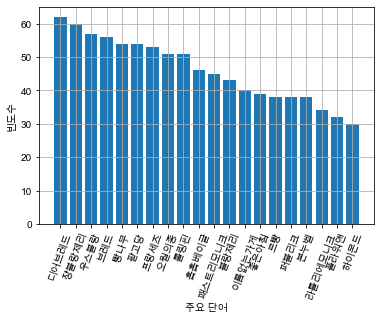

In [26]:
bk6ago = pd.read_csv('data-bakery_final_2015_tmp.csv')  
countGraph(bk6ago, 21)

ÏüùÎ∏îÎûëÏ†úÎ¶¨ : 153
Ïñ¥Í∏ÄÎ¶¨Î≤†Ïù¥Ïª§Î¶¨ : 142
Î£®ÏóòÎìúÌååÎ¶¨ : 99
Î•¥Îπµ : 90
Ïò§ÏõîÏùòÏ¢Ö : 85
ÏÜåÏö∏Î∏åÎ†àÎìú : 63
Ïù¥Î™∏Ïù¥ÎßåÎì†Îπµ : 58
Ìà¨Îñ∞Ï¶àÏóÖ : 42
ÏΩîÏΩîÎ°úÏπ¥Îùº : 38
ÎπµÏñ¥ÎãàÏä§ÌÉÄ : 37
ÌôàÏï§Î∏åÎ†àÎìú : 37
Ìö®Î™® : 37
Î®∏ÎìúÏä§ÏΩò : 34
Î∏îÎûëÏ†úÎ¶¨ÏΩîÌå° : 33
ÌÇ§ÏóêÎ¶¨ : 29
Ï∏ÑÏù¥Íµ¨Ïù¥Î∏åÎ†àÎìú : 27
ÏïÑÌã∞Ïû•Î≤†Ïù¥Ïª§Ïä§ : 27
Î∏åÎ†àÎìúÏà® : 26
Ïπ¥Î©úÎ¶¨Ïò® : 26
ÎßùÎÑõÏù¥ÎÑ§ : 26


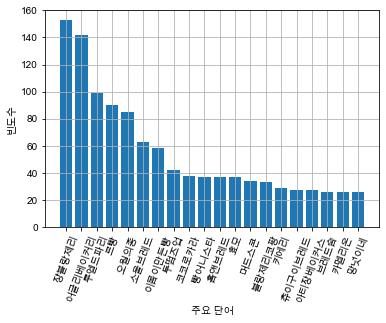

In [5]:
bk = pd.read_csv('data-bakery_final_2020.csv')  
countGraph(bk, 20)

In [22]:
len(bk)

3970

## 3) 2014 vs 2020 ÏàòÎèÑÍ∂å Î≤†Ïù¥Ïª§Î¶¨ ÏßÄÎèÑ

In [6]:
import folium

In [20]:
bk20 = pd.read_csv('bakery_which2020.csv', engine='python')  
bk14 = pd.read_csv('bakery_which2014.csv', engine='python')
bk20.dropna(inplace=True)
bk14.dropna(inplace=True)

In [15]:
# ÏßÄÎèÑÏóê ÌëúÏãú
def drawMap(df):
    bkmap = folium.Map(location=[37.4235428, 126.979006], zoom_start=12)
    for item in df.index:
        lat = df.loc[item,'latitude']
        long = df.loc[item,'longitude']
        folium.CircleMarker([lat,long],
                           radius = df.loc[item,'count']/5,
                           popup=df.loc[item,'name'],
                           color='blue',
                           fill=True).add_to(bkmap)
    return bkmap

In [19]:
drawMap(bk20)

In [21]:
drawMap(bk14)

# 2. Ïñ∏Í∏âÎêú Îã®Ïñ¥Ïùò Î≥ÄÌôî

In [ ]:
# Î™ÖÏÇ¨ Ï∂îÏ∂úÌïòÍ∏∞ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ konlpy ÏÑ§Ïπò
# Ï∂îÏ∂ú Î™ÖÏÇ¨ countÎ•º ÏúÑÌïú collection
from konlpy.tag import Okt
from collections import Counter

# ÎßêÎ≠âÏπò ÎßåÎì§Í≥† ÌÜ†ÌÅ¨ÎÇòÏù¥Ï¶à
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

In [ ]:
# ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
bk6ago = pd.read_csv('data-bakery_final_2015_tmp.csv')

content = bk6ago.loc[:,"ÎÇ¥Ïö©"]
content.head(3)
#print(okt.morphs(total[1][3]))
#print(okt.(total[1][3]))

In [ ]:
# okt Í∞ùÏ≤¥ ÏÉùÏÑ±
okt = Okt()
word = []

# okt Îã®Ïñ¥ ÏÇ¨Ï†ÑÏóê Ï∂îÍ∞ÄÌï¥Ï£ºÍ∏∞ ---> Ïñ¥Î†§Ïõ†Ïùå„Öé,,,

# Î™ÖÏÇ¨ Ï∂îÏ∂ú
noun = []
for i in range(0,len(content)):
    noun += okt.nouns(content[i])

In [ ]:
##################################
### Í∑∏ÎÉ• Ïã§Ìóò morphs, pos Ïù¥Ïö©  #####
##################################

# ÌíàÏÇ¨ Ìè¨Ìï® Îã®Ïñ¥ Ï∂îÏ∂ú
for i in range(0, len(content)):
    word += okt.morphs(content[i])
    
# ÌíàÏÇ¨Î≥Ñ Ï∂îÏ∂ú
pos = []
for i in range(0,len(content)):
    pos += okt.pos(content[i])

#print(word[0])
#print(noun[0])
#type(pos) : list
for i in range(20):
    if pos[i][1] != 'Josa':
        print(pos[i])

In [ ]:
# Î™ÖÏÇ¨ÎπàÎèÑ Ïπ¥Ïö¥Ìä∏
count = Counter(noun)
noun_list = count.most_common(150)

print(noun_list)

In [ ]:
# Î∂àÏö©Ïñ¥ Ï†úÍ±∞ ÌõÑ Î™ÖÏÇ¨ÎπàÎèÑ Ïπ¥Ïö¥Ìä∏
count = Counter(noun)
noun150 = count.most_common(300)
noun_count = []
stop = "Í≥≥, Í∏Ä, Ïó≠Ïãú, ÏöîÏ¶ò, ÏïÑÏ£º, Îìú, ÎπÑ, Î∞ò, Í∏ÄÎ¶¨, Í≤É, Ï†Ä, Ï†ú, Îçî, Ïïà, Ïù¥, Ï¢Ä, Ï†ïÎßê, Îïå, Î∂Ñ, Ï†ïÎèÑ, Í∞ú, ÌõÑÍ∏∞, Ï†Ñ, Ïßë, Í∑∏ÎÉ•, Îòê, ÎèÑ, Ïõê, Îã§Ïùå, Îã¨, ÏöîÍ±∞, ÏûÖ, Îã§Î•∏, Ïàò, ÏÜç, Ï†ê, ÎÇò, Î•ò, Î™ª, ÏùÄ, Î≤à, Ïãú, Í±∏, Îßå, Îçï"

#print(noun150[0][0])
#print(stop_list)

for i in range(0,300):
    if noun150[i][0] not in stop:
        noun_count.append(noun150[i])
        
print(noun_count)

### WordCloud

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(font_path = '/Library/Fonts/Arial Unicode.ttf',\
              background_color = "white", \
              width = 1000, \
              height = 1000, \
              max_words = 150, \
              max_font_size = 300)

# Î∂àÏö©Ïñ¥ Ï≤òÎ¶¨ Ï†Ñ
wc.generate_from_frequencies(dict(noun_count))
wc.to_file('wordcloud_6ago.png')

# 3. Ïó∞Í¥ÄÏñ¥ Î∂ÑÏÑù

## 1) 2020 ÎπµÏÜåÎã¥ Îã®Ïñ¥ ÎÑ§Ìä∏ÏõåÌÅ¨ Î∂ÑÏÑù

## Î∞©Î≤ï 1 ) 
#### *ÎÑàÎ¨¥ÎÑàÎ¨¥ÎÑàÎ¨¥ÎÑàÎ¨¥ Ïò§Îûò Í±∏Î¶¨Îãà ÌïòÏßÄ Îßê Í≤É*

### KoNLPY ÏÇ¨Ïö©ÌïòÏó¨ ÌòïÌÉúÏÜå Î∂ÑÏÑù Î∞è DTMÎßåÎì§Í∏∞

In [14]:
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx

In [40]:
bakery2020 = pd.read_csv('/Users/aohus/Documents/workspaces/Python/Studying/data-bakery2020_pre_content.csv')

In [125]:
title_list = bakery2020['Title'].tolist()
content_list = bakery2020['Content'].tolist()

['ÌõÑÍ∏∞ Îß§Ïû• Î™Ö: ÏΩîÏΩîÎ°úÏπ¥Îùº Î∞îÎÇòÎÇòÏò§Î†àÏò§, Ïπ¥ÎùºÎ≤®ÎùºÎã§ÌÅ¨Ìë∏Îî©Ïóê Ïù¥Ïñ¥ Î∞îÎÇòÎÇò, ÎØ∏ÏØîÎßêÏ∞®, Î∞úÎ°úÎÇòÎ∞ÄÌÅ¨ Î®πÏñ¥Î≥∏ ÌõÑÍ∏∞ Í∞ÄÏ†∏ÏôîÏñ¥Ïöî . <Î∞îÎÇòÎÇòÌë∏Îî©>Î∞îÎÇòÎÇòÏùò Î∂ÄÎìúÎüΩÍ≥† Îã¨ÏΩ§Ìï® + ÎãêÎùºÏõ®Ïù¥ÌçºÏùò Ï¥âÏ¥â Îã¨Îã¨ Í≥†ÏÜåÌï® + ÏÉùÍ≥ºÏùºÎ∞îÎÇòÎÇòÏùò Ïã†ÏÑ†Ìï® ÍπåÏßÄ Ìï©Ìï¥Ï†∏ÏÑú Ï∞∞Îñ°Í∂ÅÌï©Ïù¥ÏóêÏöî . Î∞îÎÇòÎÇò Ï¢ãÏïÑÌïòÏãúÎäî Î∂ÑÏùÄ 100ÌîÑÎ°ú Ï¢ãÏïÑÌïòÏã§ÎßõÏùµÏàôÌïòÏßÄÎßå ÌäπÎ≥ÑÌï¥Ïöî üíó Î∞îÎÇòÎÇò ÎçïÌõÑÎ∂ÑÎì§ Î©îÎ™®Î©îÎ™®üçå <Î∞úÎ°úÎÇòÎ∞ÄÌÅ¨Ìë∏Îî©>Ïπ¥ÎùºÎ≤®ÎùºÎã§ÌÅ¨Ìë∏Îî©Í≥ºÎäî ÎòêÎã§Î•∏ Îß§Î†•Ïù¥ÏûàÎäî Ìë∏Îî©Ïù¥ÏóêÏöîÎ∞ÄÌÅ¨Ï¥àÏΩîÏßÄÎßå ÏÉùÍ∞ÅÎ≥¥Îã§ ÏóÑÏ≤≠ Îã¨ÏßÄÏïäÏùÄ Ï†êÏù¥ Îçî ÎßòÏóê Îì§ÏóàÏñ¥Ïöî . Í∑∏Î†áÎã§Í≥† Ïïà Îã¨Îã§Í≥†Îäî ÏïàÌñàÏäµÎãàÎã§ Ï¥àÏΩîÏùò ÌíçÎØ∏Í∞Ä ÏóÑÏ≤≠ Ïûò ÎäêÍª¥ÏßÄÍ≥† Î∂ÄÏû¨Î£åÎì§Ïù¥Îûë Í∂ÅÌï©ÎèÑ ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Îã§ÌÅ¨Ìë∏Îî©Í≥º ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú Ïò§Î†åÏßÄÌïÑÎì§Ïñ¥ÏûàÍµ¨ÏöîÏ§ëÍ∞ÑÏ§ëÍ∞Ñ ÏÉÅÌÅºÌï® Ïò§Î†åÏßÄÍ∞Ä ÏîπÌòÄÏÑú ÏßàÎ¶¨ÏßÄÏïäÍ≥† Îçî ÎßõÏûàÍ≤å Î®πÏùÑ Ïàò ÏûàÏóàÏñ¥Ïöî Ï†ÄÎäî Ïã†Í∏∞ÌïòÍ≤åÎèÑ Îã§ÌÅ¨Î≥¥Îã§ Î∞ÄÌÅ¨Í∞Ä Îçî

7135

In [52]:
okt = Okt()

cv = CountVectorizer()
corpus = []
for i in range(0,len(content_list)):
    noun_list = okt.nouns(content_list[i])
    corpus.append(' '.join(noun_list))

In [53]:
DTM_Array = cv.fit_transform(corpus).toarray()
feature_names = cv.get_feature_names()
DTM_DataFrame = pd.DataFrame(DTM_Array, columns = feature_names)

DTM_DataFrame.to_csv('/Users/aohus/Documents/workspaces/Python/Studying/DTM2020.csv')

### NetworkXÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Îã®Ïñ¥ ÎèôÏãú Ï∂úÌòÑ Î∂ÑÏÑù

In [57]:
import networkx as nx
from tqdm import tqdm 

In [105]:
content_noun = pd.read_csv('/Users/aohus/Documents/workspaces/Python/Studying/DTM2020.csv')
column_list = content_noun.columns[1:]
print(column_list)

Index(['Í∞ÄÍ∞Ä', 'Í∞ÄÍ≤å', 'Í∞ÄÍ≤ê', 'Í∞ÄÍ≤üÏà©Îãà', 'Í∞ÄÍ≤©', 'Í∞ÄÍ≤©ÌÉù', 'Í∞ÄÍ≤©Ìëú', 'Í∞ÄÍ≥Ñ', 'Í∞ÄÍ≥µ', 'Í∞ÄÍ≥µÌíà',
       ...
       'ÌûåÏ§Ñ', 'ÌûåÌåê', 'ÌûêÍ≤É', 'ÌûêÎßÅ', 'ÌûêÌäº', 'ÌûòÍªè', 'ÌûòÎã®', 'ÌûòÎì§ÏóáÏñ¥', 'ÌûôÏßÄÎ°úÎãµ', 'ÌûôÌïò'],
      dtype='object', length=19702)


In [103]:
word_length = len(column_list)
count_dict = {}

count_dict[column_list[i], column_list[j]] = count_dict.get((column_list[i],column_list[j]),0) + max(tmp[word1], tmp[column_list[j]])
"""
for doc in tqdm(range(len(content_noun)), desc='Îã®Ïñ¥Ïåç ÎßåÎì§Í∏∞'):
    tmp = content_noun.loc[doc]
    for i, word1 in enumerate(column_list):
        if tmp[word1]:
            for j in range(i+1, word_length):
                if tmp[column_list[j]]:
                    count_dict[column_list[i], column_list[j]] = count_dict.get((column_list[i],column_list[j]),0) + max(tmp[word1], tmp[column_list[j]])

count_list = []
for words in count_dict:
    count_list.append([words[0], words[1], count_dict[words]])
    
df = pd.DataFrame(count_list, columns=["word1", "words", "freq"])
df = df.sort_values(by=['freq'], ascending=False)
df = df.reset_index(drop=True)

df.to_csv('/Users/aohus/Documents/workspaces/Python/Studying/networkx2020.csv')
"""

Îã®Ïñ¥Ïåç ÎßåÎì§Í∏∞:   0%|          | 0/7135 [00:00<?, ?it/s]


NameError: name 'coun_dict' is not defined

### Îã®Ïñ¥ ÎÑ§Ìä∏ÏõåÌÅ¨ ÏãúÍ∞ÅÌôî

In [ ]:
# ! pip3 install operator

In [64]:
import operator
import matplotlib.pyplot as plt

In [68]:
# Îã®Ïñ¥ ÏàúÏÑúÏåç Îç∞Ïù¥ÌÑ∞
dataset = pd.read_csv('/Users/aohus/Documents/workspaces/Python/Studying/networkx2020.csv')

# Ï§ëÏã¨ÏÑ± Ï≤ôÎèÑ Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú Í∑∏ÎûòÌîÑ
G_centrality = nx.Graph()

# ÎπàÎèÑÏàòÍ∞Ä 200 Ïù¥ÏÉÅÏù∏ Îã®Ïñ¥ÏåçÏóê ÎåÄÌï¥ÏÑú edge
for ind in range((len(np.where(dataset['freq'] >= 200)[0]))):
    G_centrality.add_edge(dataset['word1'][ind], data['word2'][ind], weight=int(dataset['freq'][ind]))
dgr = nx.degree_centrality(G_centrality)       # Ïó∞Í≤∞Ï§ëÏã¨
btw = nx.betweenness_centrality(G_centrality)  # Îß§Í∞úÏ§ëÏã¨
cls = nx.closeness_centrality(G_centrality)    # Í∑ºÏ†ëÏ§ëÏã¨
#egv = nx.eigenvector_centrality(G_centrality)  # Í≥†Ïú†Î≤°ÌÑ∞
pgr = nx.pagerank(G_centrality)                # ÌéòÏù¥ÏßÄÎû≠ÌÅ¨

# Ï§ëÏã¨ÏÑ±Ïù¥ ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨
sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
#sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)
sorted_pgr = sorted(pgr.items(), key=operator.itemgetter(1), reverse=True)

In [79]:
# Îã®Ïñ¥ ÎÑ§Ìä∏ÏõåÌÅ¨Î•º Í∑∏Î†§Ï§Ñ Í∑∏ÎûòÌîÑ
G = nx.Graph()

# ÌéòÏù¥ÏßÄ Îû≠ÌÅ¨Ïóê Îî∞Îùº Îëê ÎÖ∏Ìä∏ ÏÇ¨Ïù¥Ïùò Ïó∞Í¥ÄÏÑ±ÏùÑ Í≤∞Ï†ïÌïúÎã§.(Îã®Ïñ¥ÏåçÏùò Ïó∞Í¥ÄÏÑ±)
# Ïó∞Í≤∞ Ï§ëÏã¨ÏÑ±ÏúºÎ°ú Í≥ÑÏÇ∞Ìïú Ï≤ôÎèÑÏóê Îî∞Îùº ÎÖ∏ÎìúÏùò ÌÅ¨Í∏∞Í∞Ä Í≤∞Ï†ïÎêòÎã§.(Îã®Ïñ¥Ïùò ÎπàÎèÑÏàò)
for i in range(len(sorted_pgr)):
    G.add_node(sorted_pgr[i][0], nodesize=sorted_dgr[i][1])
for ind in range((len(np.where(dataset['freq'] > 200)[0]))):
    G.add_weighted_edges_from([(dataset['word1'][ind], dataset['word2'][ind], int(dataset['freq'][ind]))])

# ÎÖ∏Îìú ÌÅ¨Í∏∞ Ï°∞Ï†ï
sizes = [G.nodes[node]['nodesize'] * 500 for node in G]
options = {
    'edge_color' : '#FFDEA2',
    'width':1,
    'with_labels':True,
    'font_weight': 'regular'
}

# Ìè∞Ìä∏ ÏÑ§Ï†ïÏùÑ ÏúÑÌïú font_manager
# import matplotlib.font_manager as fm - ÏúÑÏóê from matplotlib import font_manager , rc
# import matplotlib.pyplot as plt - ÏúÑÏóê
font_fname = '/Library/Fonts/Arial Unicode.ttf'
fontprop = font_manager.FontProperties(fname = font_fname, size=18).get_name()
nx.draw(G, node_size=sizes, pos=nx.spring_layout(G, k=3.5, iterations=100), **options, font_family=font_prop)
ax = plt.gca()
ax.collections[0].set_edgecolor('#555555')
plt.show()


NameError: name 'font_prop' is not defined

#### *ÏÜçÎèÑÎ•º ÎÜíÏó¨Î¥ÖÏãúÎã§*
## Î∞©Î≤ï 2 )
### (1) Í≤åÏãúÍ∏Ä Îã®ÏúÑ (2) Î¨∏Ïû• Îã®ÏúÑ

In [17]:
#bakery2020 = pd.read_csv('/Users/aohus/Documents/workspaces/Python/Studying/data-bakery2020_pre_content.csv')

okt = Okt()

# Í≤åÏãúÍ∏Ä Îã®ÏúÑ Î≥∏Î¨∏
content_list = bk6ago['ÎÇ¥Ïö©'].tolist()

In [18]:
# Î¨∏Ïû•Îã®ÏúÑ Î≥∏Î¨∏
line_list = []
for i in range(len(content_list)):
    sentence = []
    sentence = re.split("[.!? \"Ïñ¥Ïöî\" \"ÎãàÎã§\"] ", content_list[i])
    for j in range(len(sentence)):
        line_list.append(sentence[j])
print(line_list[1:10])
print(len(line_list))

['Ï†ÄÎäî ÏôÑÏ†Ñ Ï¢ãÏïÑÌï¥', 'ÌäπÌûà Ïî®Ìè¨Ïùò ÌÅ¨Î†ôÏºÄÏùµÏù¥ÎùºÎ©¥ ÎßàÎã§Ìï† Ïù¥Ïú†Í∞Ä ÏóÜÏ£† ÏñáÏùÄ ÌÅ¨Î†àÌéò ÏÇ¨Ïù¥Î°ú ÏºúÏºúÏù¥ ÌÅ¨Î¶ºÏù¥ ÏÉåÎìúÎêò', 'ÏûàÎäî Ìô©ÌôÄÌïú Îã®Î©¥ „Ö†„Ö†Ï†ïÎßê Ïî®Ìè¨Ïùò ÌÅ¨Î†ôÏºÄÏùµÏùÄ Ïß±Ïß±Ïù¥Ïòà', 'Ïó¨Í∏∞Îäî Îç∞Î¶¨Í≥† Í∞Ñ ÏßÄÏù∏Îßà', 'Îã§Îì§ Ïù¥Îü∞ Í≥≥ ÏïåÎ†§Ï§òÏÑú Í≥†ÎßôÎã§Í≥† Ìï† Ï†ïÎèÑ Í∑∏Î¶¨Í≥† ÎπµÏùÄ ÏïÑÎãàÏßÄÎßå ÌÅ¨Î†ôÏºÄÏùµ Î™ªÏßÄ ÏïäÍ≤å Í∞ïÏ∂îÌïòÍ≥†Ìîà Î©îÎâ¥Îäî Î∞îÎ°ú Î∞ÄÌÅ¨Ìã∞ÎπôÏàò ÎààÍΩÉÎπôÏàòÏôÄÎäî Îòê Îã§Î•∏ ÏñºÏùåÍ≤∞ Ï†àÎåÄ Í±∞Ïπ†ÏßÄ ÏïäÏïÑ', 'ÏÇ¨Î•¥Î•¥ ÎÖπÏïÑ', 'Ìå•ÏùÑ Îî∞Î°ú Ï§òÏÑú Ï∑®Ìñ•Ïóê Îî∞Îùº Î®πÏùÑ Ïàò Ïûà', 'ÎçîÏö± Ï¢ãÏïÑ', 'ÏúÑÏπòÎäî Í∞ÄÎ°úÏàòÍ∏∏ Î©îÏù∏ Ïä§Ìä∏Î¶¨Ìä∏Îäî ÏïÑÎãàÍ≥† Ïã†ÏÇ¨Ï§ëÌïôÍµê ÎßûÏùÄ Ìé∏Ïù¥ÎùºÍ≥† ÏÉùÍ∞ÅÌïòÍ≥† Í∞ÄÏãúÎäî Í≤å Îçî Ìé∏Ìï† Í≤É Í∞ôÏïÑ']
117860


In [19]:
text = "python is, an easy;lan! guage; to, learn."
print(re.split("[;!] ", text))

['python is, an easy;lan', 'guage', 'to, learn.']


### ÏÜçÎèÑÎ•º ÎÜíÏù¥Í∏∞ ÏúÑÌïú Î∞©Î≤ï1: Îã®Ïñ¥Ïóê Í≥†Ïú† IDÎ•º Î∂ÄÏó¨

In [20]:
class VocabDict:
# Îã®Ïñ¥Ïóê Í≥†Ïú† IDÎ•º Î∂ÄÏó¨Ìï¥Ï£ºÎäî ÌÅ¥ÎûòÏä§
    def __init__(self):
        self.d = {}  # Îã®Ïñ¥->Îã®Ïñ¥IDÎ°ú Î≥ÄÌôòÌï†Îïå ÏÇ¨Ïö©
        self.w = []  # Îã®Ïñ¥ID->Îã®Ïñ¥Î°ú Î≥ÄÌôòÌï† Îïå ÏÇ¨Ïö©
 
    def getIdOrAdd(self, word):
# Îã®Ïñ¥Í∞Ä Ïù¥ÎØ∏ ÏÇ¨Ï†ÑÏóê Îì±Î°ùÎêú Í≤ÉÏù¥Î©¥ Ìï¥ÎãπÌïòÎäî IDÎ•º ÎèåÎ†§Ï£ºÍ≥†
        if word in self.d: return self.d[word]
# Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ ÏÉàÎ°ú ÏÇ¨Ï†ÑÏóê Îì±Î°ùÌïòÍ≥† IDÎ•º Î∂ÄÏó¨Ìï®
        self.d[word] = len(self.d)
        self.w.append(word)
        return len(self.d) - 1
 
    def getId(self, word):
# Îã®Ïñ¥Í∞Ä ÏÇ¨Ï†ÑÏóê Îì±Î°ùÎêòÏñ¥ÏûàÎäî Í≤ΩÏö∞ IDÎ•º ÎèåÎ†§Ï£ºÍ≥†
        if word in self.d: return self.d[word]
# Í∑∏Î†áÏßÄ ÏïäÏùÄ Í≤ΩÏö∞ -1ÏùÑ ÎèåÎ†§Ï§å
        return -1
 
    def getWord(self, id):
        return self.w[id]

### ÏÜçÎèÑÎ•º ÎÜíÏù¥Í∏∞ ÏúÑÌïú Î∞©Î≤ï2 : ÎπàÎèÑÏàò 10 Ïù¥ÌïòÏù∏ Îã®Ïñ¥ & 1Í∏ÄÏûê Îã®Ïñ¥Îäî Î∂ÑÏÑùÏóêÏÑú Ï†úÏô∏

#### Í≤åÏãúÍ∏Ä Í∏∞Ï§Ä

In [22]:
vDict = VocabDict()
vDictFiltered = VocabDict()
wcount = {}  # Îã®Ïñ¥Î≥Ñ ÎπàÎèÑÍ∞Ä Ï†ÄÏû•Îê† dict

# ÌååÏùºÏùÑ ÌõëÏúºÎ©∞ Îã®Ïñ¥Î≥Ñ ÎπàÎèÑÎ•º Í≥ÑÏÇ∞Ìï®
for line in content_list:
    words =list(set(okt.nouns(line)))
    for w in words:
        wid = vDict.getIdOrAdd(w)
        wcount[wid] = wcount.get(wid, 0) + 1
for wid, num in wcount.items():
    if num < 10 : continue
    # 10Ìöå Ïù¥ÏÉÅ Îì±Ïû•Ìïú Í≤ÉÎì§Îßå vDictFilteredÏóê Ï†ÄÏû•Ìï®
    vDictFiltered.getIdOrAdd(vDict.getWord(wid))
#vDict = None  # vDictÏóê Ìï†ÎãπÎêú Î©îÎ™®Î¶¨ Î∞òÎÇ©

In [23]:
count = {}   #ÎèôÏãúÏ∂úÌòÑ ÎπàÎèÑÍ∞Ä Ï†ÄÏû•Îê† dict

setdiff = {"Ï†ú", "Ï†Ä", "Ïù¥","Í≥≥","ÏßÑÏßú","ÏÉùÍ∞Å","Ï†ïÎßê","ÌõÑÍ∏∞","Í∑∏ÎÉ•","Îã§Î•∏","ÌïòÎÇò","Ï†ïÎèÑ","Ïù¥Í±¥","Îß§Ïû•","Î≠îÍ∞Ä","ÏûêÏ£º","Î¨¥ÎÇú","Ïò§Îäò","Îòê",
           "Î™Ö","ÏúÑ","Í±∏","ÏûÖ","Íº≠","Í∞ú","Ï§ë","Î∂Ñ","Ïàò","Í∏Ä","Ï§ë","Îïå","Í±∞", "Ï¢Ä", "Ïïà", "Í≤É", "Ïó¨Í∏∞","Îã¨","Îçî","Îßõ","Ìï®", "Î∂Ä", 
           "Îßò", "ÎÇ†", "Î≤à", "Îçï", "ÎèÑ", "ÎÇò","Î≤†Ïù¥Ïª§Î¶¨", "Ï†ê", "ÏïΩÍ∞Ñ", "Ï°∞Í∏à", "Îã§Ïùå", "ÏÇ¥Ïßù", "Î∞îÎ°ú",
           "Í∞ê","ÎäêÎÇå","Îßê", "ÏßÄÍ∏à","Í≥ÑÏÜç","Î∂ÄÎ∂Ñ","Ï†Ñ","Î≠ê","Í±∞Ïùò","Ï†Ñ","ÎπµÏßë","Îπµ","Í±∞Í∏∞","Îã§Ïãú","Ìé∏Ïù¥","ÎØ∏Í∞Ä","ÌïúÎ≤à","ÏùºÎã®","Ïù¥Íµ¨",
          "Ïßë","Ìï¥","Ï§Ñ","Í∏∏","Í∞ÄÏû•"}
           
# ÌååÏùºÏùÑ Îã§Ïãú ÌõëÏúºÎ©∞ ÎèôÏãúÏ∂úÌòÑÎπàÎèÑÎ•º Í≥ÑÏÇ∞Ìï®         
for line in content_list:
    words = list(set(okt.nouns(line)) - setdiff)  #Îã®Ïñ¥Î≥ÑÎ°ú Î∂ÑÎ¶¨Ìïú Í≤ÉÏùÑ setÏóê ÎÑ£Ïñ¥ Ï§ëÎ≥µ Ï†úÍ±∞ÌïòÍ≥†, Îã§Ïãú listÎ°ú Î≥ÄÍ≤Ω

#vDictFilteredÏóê Ìè¨Ìï®Îêú Îã®Ïñ¥Îì§Ïóê ÎåÄÌï¥ÏÑúÎßå widÎ•º Íµ¨Ìï®
    wids = list(filter(lambda wid : wid>=0, [vDictFiltered.getId(w) for w in words]))
    for i, a in enumerate(wids):
        for b in wids[i+1:]:
            if a == b: continue   #Í∞ôÏùÄ Îã®Ïñ¥Ïùò Í≤ΩÏö∞Îäî ÏÑ∏ÏßÄ ÏïäÏùå
            if a > b: a, b = b, a   #A, BÏôÄ B, AÍ∞Ä Îã§Î•¥Í≤å ÏÑ∏Ïñ¥ÏßÄÎäîÍ≤ÉÏùÑ ÎßâÍ∏∞ ÏúÑÌï¥ Ìï≠ÏÉÅ a < bÎ°ú ÏàúÏÑú Í≥†Ï†ï
            count[a, b] = count.get((a, b), 0) + 1   #Ïã§Ï†úÎ°ú ÏÑºÎã§
            # print(count[a, b])

In [24]:
count_list = []
for words in count:
    count_list.append([vDictFiltered.getWord(words[0]), vDictFiltered.getWord(words[1]), count[words]])

df = pd.DataFrame(count_list, columns=["word1", "word2", "freq"])
df = df.sort_values(by=['freq'], ascending=False)
df = df.reset_index(drop=True)

df.to_csv('networkx_6ago.csv')

#### Î¨∏Ïû• Í∏∞Ï§Ä

In [25]:
"""
vDict = VocabDict()
vDictFiltered = VocabDict()
wcount = {}  # Îã®Ïñ¥Î≥Ñ ÎπàÎèÑÍ∞Ä Ï†ÄÏû•Îê† dict

# ÌååÏùºÏùÑ ÌõëÏúºÎ©∞ Îã®Ïñ¥Î≥Ñ ÎπàÎèÑÎ•º Í≥ÑÏÇ∞Ìï®
for line in line_list:
    words =list(set(okt.nouns(line)))
    for w in words:
        wid = vDict.getIdOrAdd(w)
        wcount[wid] = wcount.get(wid, 0) + 1
for wid, num in wcount.items():
    if num < 10 or len(vDict.getWord(wid)) == 1: continue
    # 10Ìöå Ïù¥ÏÉÅ Îì±Ïû•Ìïú Í≤ÉÎì§Îßå vDictFilteredÏóê Ï†ÄÏû•Ìï®
    # if num < 10 & len(vDict.getWord(wid)) > 1 : 
    vDictFiltered.getIdOrAdd(vDict.getWord(wid))
#vDict = None  # vDictÏóê Ìï†ÎãπÎêú Î©îÎ™®Î¶¨ Î∞òÎÇ©
"""

count = {}   #ÎèôÏãúÏ∂úÌòÑ ÎπàÎèÑÍ∞Ä Ï†ÄÏû•Îê† dict
setdiff = {"Ï†ú", "Ï†Ä", "Ïù¥","Í≥≥","ÏßÑÏßú","ÏÉùÍ∞Å","Ï†ïÎßê","ÌõÑÍ∏∞","Í∑∏ÎÉ•","Îã§Î•∏","ÌïòÎÇò","Ï†ïÎèÑ","Ïù¥Í±¥","Îß§Ïû•","Î≠îÍ∞Ä","ÏûêÏ£º","Î¨¥ÎÇú","Ïò§Îäò","Îòê",
           "Î™Ö","ÏúÑ","Í±∏","ÏûÖ","Íº≠","Í∞ú","Ï§ë","Î∂Ñ","Ïàò","Í∏Ä","Ï§ë","Îïå","Í±∞", "Ï¢Ä", "Ïïà", "Í≤É", "Ïó¨Í∏∞","Îã¨","Îçî","Îßõ","Ìï®", "Î∂Ä", 
           "Îßò", "ÎÇ†", "Î≤à", "Îçï", "ÎèÑ", "ÎÇò","Î≤†Ïù¥Ïª§Î¶¨", "Ï†ê", "ÏïΩÍ∞Ñ", "Ï°∞Í∏à", "Îã§Ïùå", "ÏÇ¥Ïßù", "Î∞îÎ°ú",
           "Í∞ê","ÎäêÎÇå","Îßê", "ÏßÄÍ∏à","Í≥ÑÏÜç","Î∂ÄÎ∂Ñ","Ï†Ñ","Î≠ê","Í±∞Ïùò","Ï†Ñ","ÎπµÏßë","Îπµ","Í±∞Í∏∞","Îã§Ïãú","Ìé∏Ïù¥","ÎØ∏Í∞Ä","ÌïúÎ≤à","ÏùºÎã®","Ïù¥Íµ¨",
          "Ïßë","Ìï¥","Ï§Ñ","Í∏∏","Í∞ÄÏû•"}
           
# ÌååÏùºÏùÑ Îã§Ïãú ÌõëÏúºÎ©∞ ÎèôÏãúÏ∂úÌòÑÎπàÎèÑÎ•º Í≥ÑÏÇ∞Ìï®         
for line in line_list:
    words = list(set(okt.nouns(line)) - setdiff)  #Îã®Ïñ¥Î≥ÑÎ°ú Î∂ÑÎ¶¨Ìïú Í≤ÉÏùÑ setÏóê ÎÑ£Ïñ¥ Ï§ëÎ≥µ Ï†úÍ±∞ÌïòÍ≥†, Îã§Ïãú listÎ°ú Î≥ÄÍ≤Ω
    
#vDictFilteredÏóê Ìè¨Ìï®Îêú Îã®Ïñ¥Îì§Ïóê ÎåÄÌï¥ÏÑúÎßå widÎ•º Íµ¨Ìï®
    wids = list(filter(lambda wid : wid>=0, [vDictFiltered.getId(w) for w in words]))
    for i, a in enumerate(wids):
        for b in wids[i+1:]:
            if a == b: continue   #Í∞ôÏùÄ Îã®Ïñ¥Ïùò Í≤ΩÏö∞Îäî ÏÑ∏ÏßÄ ÏïäÏùå
            if a > b: a, b = b, a   #A, BÏôÄ B, AÍ∞Ä Îã§Î•¥Í≤å ÏÑ∏Ïñ¥ÏßÄÎäîÍ≤ÉÏùÑ ÎßâÍ∏∞ ÏúÑÌï¥ Ìï≠ÏÉÅ a < bÎ°ú ÏàúÏÑú Í≥†Ï†ï
            count[a, b] = count.get((a, b), 0) + 1   #Ïã§Ï†úÎ°ú ÏÑºÎã§
            # print(count[a, b])
            
count_list = []
for words in count:
    count_list.append([vDictFiltered.getWord(words[0]), vDictFiltered.getWord(words[1]), count[words]])

df = pd.DataFrame(count_list, columns=["word1", "word2", "freq"])
df = df.sort_values(by=['freq'], ascending=False)
df = df.reset_index(drop=True)

df.to_csv('networkx2013_line.csv')

### ÏãúÍ∞ÅÌôî

In [68]:
def drawNetworkx(dataset, num, k, iterations):
    # Ï§ëÏã¨ÏÑ± Ï≤ôÎèÑ Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú Í∑∏ÎûòÌîÑ
    G_centrality = nx.Graph()

    # ÎπàÎèÑÏàòÍ∞Ä 1000 Ïù¥ÏÉÅÏù∏ Îã®Ïñ¥ÏåçÏóê ÎåÄÌï¥ÏÑú edge
    for ind in range((len(np.where(dataset['freq'] >= num)[0]))):
        G_centrality.add_edge(dataset['word1'][ind], dataset['word2'][ind], weight=int(dataset['freq'][ind]))
    dgr = nx.degree_centrality(G_centrality)       # Ïó∞Í≤∞Ï§ëÏã¨
    btw = nx.betweenness_centrality(G_centrality)  # Îß§Í∞úÏ§ëÏã¨
    cls = nx.closeness_centrality(G_centrality)    # Í∑ºÏ†ëÏ§ëÏã¨
    #egv = nx.eigenvector_centrality(G_centrality)  # Í≥†Ïú†Î≤°ÌÑ∞
    pgr = nx.pagerank(G_centrality)  

    # Ï§ëÏã¨ÏÑ±Ïù¥ ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú Ï†ïÎ†¨
    sorted_dgr = sorted(dgr.items(), key=operator.itemgetter(1), reverse=True)
    sorted_btw = sorted(btw.items(), key=operator.itemgetter(1), reverse=True)
    sorted_cls = sorted(cls.items(), key=operator.itemgetter(1), reverse=True)
    #sorted_egv = sorted(egv.items(), key=operator.itemgetter(1), reverse=True)
    sorted_pgr = sorted(pgr.items(), key=operator.itemgetter(1), reverse=True)

    # Îã®Ïñ¥ ÎÑ§Ìä∏ÏõåÌÅ¨Î•º Í∑∏Î†§Ï§Ñ Í∑∏ÎûòÌîÑ
    G = nx.Graph()

    # ÌéòÏù¥ÏßÄ Îû≠ÌÅ¨Ïóê Îî∞Îùº Îëê ÎÖ∏Ìä∏ ÏÇ¨Ïù¥Ïùò Ïó∞Í¥ÄÏÑ±ÏùÑ Í≤∞Ï†ïÌïúÎã§.(Îã®Ïñ¥ÏåçÏùò Ïó∞Í¥ÄÏÑ±)
    # Ïó∞Í≤∞ Ï§ëÏã¨ÏÑ±ÏúºÎ°ú Í≥ÑÏÇ∞Ìïú Ï≤ôÎèÑÏóê Îî∞Îùº ÎÖ∏ÎìúÏùò ÌÅ¨Í∏∞Í∞Ä Í≤∞Ï†ïÎêòÎã§.(Îã®Ïñ¥Ïùò ÎπàÎèÑÏàò)
    for i in range(len(sorted_dgr)):
        G.add_node(sorted_pgr[i][0], nodesize=sorted_dgr[i][1])
    for ind in range((len(np.where(dataset['freq'] > num)[0]))):
        G.add_weighted_edges_from([(dataset['word1'][ind], dataset['word2'][ind], int(dataset['freq'][ind]))])

    # ÎÖ∏Îìú ÌÅ¨Í∏∞ Ï°∞Ï†ï
    sizes = [G.nodes[node]['nodesize'] * 500 for node in G]
    options = {
        'edge_color' : '#F0E5DE',
        'width':1.5,
        'with_labels':True,
        'font_weight': 'regular'
    }

    figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')

    # Ìè∞Ìä∏ ÏÑ§Ï†ïÏùÑ ÏúÑÌïú font_manager
    # import matplotlib.font_manager as fm - ÏúÑÏóê from matplotlib import font_manager , rc
    # import matplotlib.pyplot as plt - ÏúÑÏóê
    font_fname = '/Library/Fonts/Arial Unicode.ttf'
    font_prop = font_manager.FontProperties(fname = font_fname, size=18).get_name()
    nx.draw(G, node_size=sizes, node_color = '#eb9f9f',pos=nx.spring_layout(G, k=k, iterations=iterations), **options, font_family=font_prop)
    ax = plt.gca()
    ax.collections[0].set_edgecolor('#F0E5DE')
    plt.show()

In [27]:
# Îã®Ïñ¥ ÏàúÏÑúÏåç Îç∞Ïù¥ÌÑ∞
dataset_page = pd.read_csv('networkx_6ago.csv')
dataset_line = pd.read_csv('networkx2013_line.csv')

#### Í≤åÏãúÍ∏Ä Í∏∞Ï§Ä

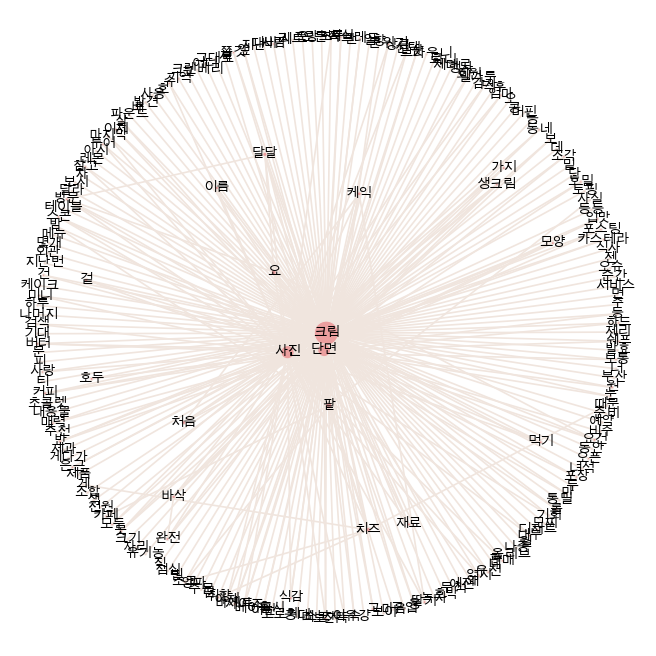

In [99]:
drawNetworkx(dataset_page, 3000, 300, 1000)

#### Î¨∏Ïû• Í∏∞Ï§Ä

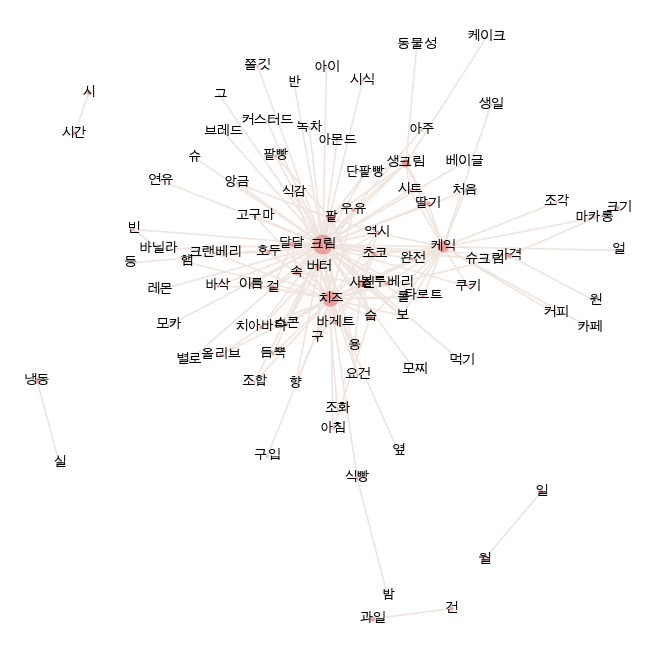

In [80]:
drawNetworkx(dataset_line, 300, 10, 200)